## A Quick EDA of the Scrapped Data

### Basic Stats

In [58]:
%store -r cm_df

In [59]:
cm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
season_number,323.0,7.569659,4.064382,1.00,4.00,8.00,11.000,15.00
episode_number_overall,323.0,162.000000,93.386294,1.00,81.50,162.00,242.500,323.00
episode_number,323.0,11.609907,6.648880,1.00,6.00,11.00,17.000,25.00
imdb_rating,323.0,7.659752,0.428694,6.60,7.40,7.60,7.900,9.10
imdb_votes,323.0,1857.863777,546.133513,523.00,1585.00,1838.00,2137.000,3784.00
us_viewers_in_millions,323.0,11.254241,3.512967,3.74,9.08,11.98,13.775,26.31


In [60]:
cm_df.imdb_rating.mean().round(2)

7.66

In [61]:
print(f'Highest Episode Rating in the series is {cm_df.imdb_rating.max()}')
print(f'Lowest Episode Rating in the series is {cm_df.imdb_rating.min()}')

Highest Episode Rating in the series is 9.1
Lowest Episode Rating in the series is 6.6


In [62]:
print(f'Average Viewers for the series is {cm_df.us_viewers_in_millions.mean().round(2)} Million')

Average Viewers for the series is 11.25 Million


In [63]:
#lowest rating in each season
cm_df.groupby('season_number')['imdb_rating'].min()

season_number
1     7.1
2     7.1
3     7.4
4     7.0
5     7.2
6     7.2
7     7.2
8     7.1
9     7.4
10    7.0
11    6.6
12    6.8
13    6.9
14    7.1
15    7.1
Name: imdb_rating, dtype: float64

In [64]:
#highest rating in each season
cm_df.groupby('season_number')['imdb_rating'].max()

season_number
1     8.5
2     8.8
3     8.6
4     8.5
5     9.1
6     8.6
7     8.4
8     8.6
9     8.6
10    8.7
11    9.1
12    8.3
13    8.5
14    8.3
15    8.6
Name: imdb_rating, dtype: float64

In [65]:
#lowest viewership in each season
cm_df.groupby('season_number')['us_viewers_in_millions'].min()

season_number
1     10.57
2     12.80
3     12.66
4     12.48
5     12.39
6     12.02
7     11.34
8     10.08
9      9.42
10     8.72
11     7.64
12     6.54
13     5.04
14     4.29
15     3.74
Name: us_viewers_in_millions, dtype: float64

In [66]:
#highest viewership in each season
cm_df.groupby('season_number')['us_viewers_in_millions'].max()

season_number
1     19.57
2     26.31
3     16.23
4     17.01
5     15.85
6     14.58
7     14.14
8     12.64
9     12.92
10    11.74
11    10.94
12     8.92
13     7.00
14     5.50
15     5.88
Name: us_viewers_in_millions, dtype: float64

In [67]:
#avg million viewers each season
cm_df.groupby('season_number')['us_viewers_in_millions'].mean().round(2)

season_number
1     13.88
2     15.87
3     14.07
4     14.39
5     13.70
6     13.62
7     12.64
8     11.43
9     10.88
10    10.31
11     9.01
12     7.47
13     5.73
14     4.67
15     4.71
Name: us_viewers_in_millions, dtype: float64

### Viewership Trend

In [68]:
import matplotlib.pyplot as plt

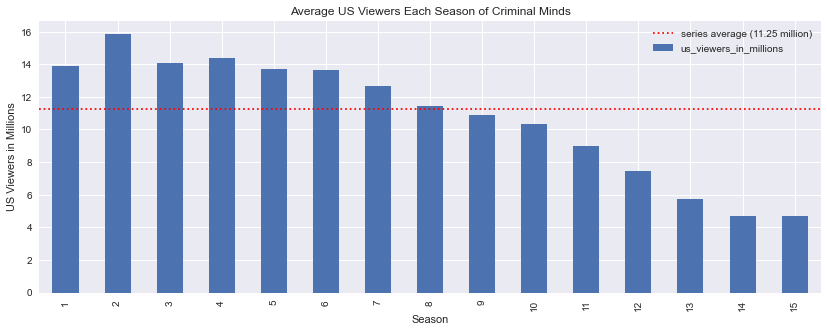

In [69]:
#avg viwership for each season plotted
cm_df.groupby('season_number')['us_viewers_in_millions'].mean().round(2).plot.bar(
    plt.style.use('seaborn'), plt.figure(figsize=(14,5)),
    title='Average US Viewers Each Season of Criminal Minds',
    ylabel='US Viewers in Millions', xlabel='Season')

plt.axhline(y=cm_df.us_viewers_in_millions.mean().round(2),
            label=f'series average ({cm_df.us_viewers_in_millions.mean().round(2)} million)',
            c='red', ls=':')
plt.legend()

Viewership in US goes below the series average of 11.25 Million after season 8

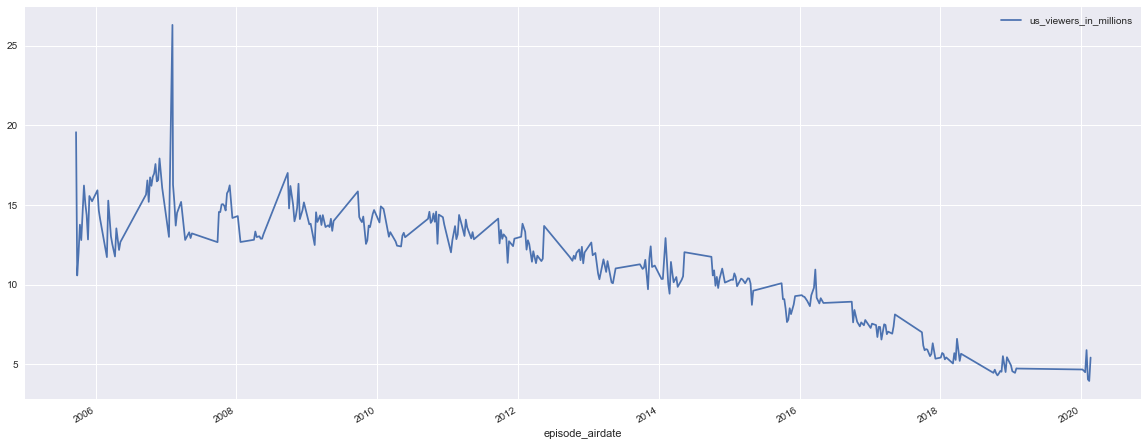

In [70]:
cm_df.groupby('episode_airdate')['us_viewers_in_millions'].mean().round(2).plot.line(
    plt.style.use('seaborn'), plt.figure(figsize=(20,8)))

plt.legend()

### Episode Ratings Distribution

In [71]:
import seaborn as sns

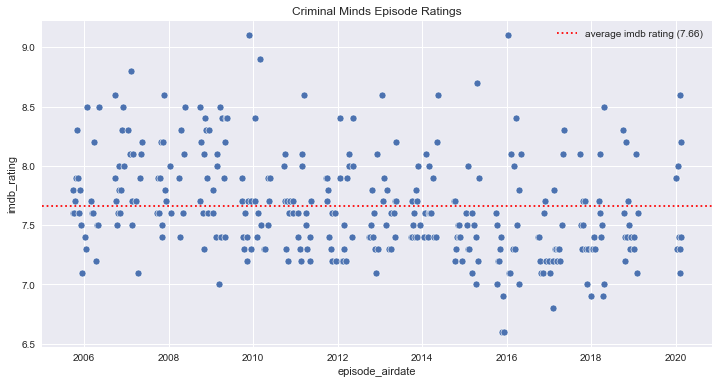

In [72]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=cm_df, x='episode_airdate', y='imdb_rating')
plt.title('Criminal Minds Episode Ratings')

plt.axhline(y=cm_df.imdb_rating.mean().round(2), 
            label=f'average imdb rating ({cm_df.imdb_rating.mean().round(2)})',
            ls=':', c='red')

plt.legend()

In [73]:
#episodes in each season that got ratings below the mean of 7.66
#cm_df[cm_df.imdb_rating < cm_df.imdb_rating.mean()]
cm_df[cm_df.imdb_rating < cm_df.imdb_rating.mean()].groupby('season_number')['episode_number'].count().reset_index()

,season_number,episode_number
0,1,12
1,2,5
2,3,8
3,4,8
4,5,12
5,6,14
6,7,12
7,8,15
8,9,15
9,10,18


### Release Trends

In [74]:
cm_df.season_number.nunique()

15

In [75]:
#the date each season started
cm_df.groupby('season_number')['episode_airdate'].min()

season_number
1    2005-09-22
2    2006-09-20
3    2007-09-26
4    2008-09-24
5    2009-09-23
6    2010-09-22
7    2011-09-21
8    2012-09-26
9    2013-09-25
10   2014-10-01
11   2015-09-30
12   2016-09-28
13   2017-09-27
14   2018-10-03
15   2020-01-08
Name: episode_airdate, dtype: datetime64[ns]

In [76]:
#the length of each season
#first airdate - last airdate
#abs() to show results as absolute value #reset_index() returns season_number as a column

season_duration = (cm_df.groupby('season_number')['episode_airdate'].min()
                   - cm_df.groupby('season_number')['episode_airdate'].max()).abs().reset_index()
season_duration

,season_number,episode_airdate
0,1,230 days
1,2,238 days
2,3,238 days
3,4,238 days
4,5,245 days
5,6,238 days
6,7,238 days
7,8,238 days
8,9,231 days
9,10,217 days


In [77]:
cm_df.groupby('season_number')['episode_number'].count().reset_index()

,season_number,episode_number
0,1,22
1,2,23
2,3,20
3,4,25
4,5,23
5,6,24
6,7,24
7,8,24
8,9,24
9,10,23


season 15 only aired for 42 days making it the most shortlived season of the show, and with only 10 episodes it has the lowest episode count

In [78]:
cm_df[cm_df['season_number']==15].us_viewers_in_millions.mean().round(2)

4.71

#### Duration between Season Releases

In [110]:
cm_df2 = cm_df[['season_number','episode_number']]
cm_df2['season_start'] = cm_df.groupby('season_number')['episode_airdate'].transform('min')
cm_df2['season_end'] = cm_df.groupby('season_number')['episode_airdate'].transform('max')

In [114]:
cm_df2.sample(5)

,season_number,episode_number,season_start,season_end
89,4,25,2008-09-24,2009-05-20
48,3,4,2007-09-26,2008-05-21
152,7,16,2011-09-21,2012-05-16
112,5,23,2009-09-23,2010-05-26
137,7,1,2011-09-21,2012-05-16


In [115]:
#when each season started and ended
cm_df2.groupby('season_number')[['season_start','season_end']].max().reset_index()

,season_number,season_start,season_end
0,1,2005-09-22,2006-05-10
1,2,2006-09-20,2007-05-16
2,3,2007-09-26,2008-05-21
3,4,2008-09-24,2009-05-20
4,5,2009-09-23,2010-05-26
5,6,2010-09-22,2011-05-18
6,7,2011-09-21,2012-05-16
7,8,2012-09-26,2013-05-22
8,9,2013-09-25,2014-05-14
9,10,2014-10-01,2015-05-06


In [121]:
#get the difference between the start date of a season and the end date of the previous series
for season_no in range(15):
    release_gap = cm_df2[cm_df2.season_number == season_no].season_end.max() - cm_df2[cm_df2.season_number == season_no+1].season_start.min()
    release_gap = release_gap
    
    print(release_gap)

NaT
-133 days +00:00:00
-133 days +00:00:00
-126 days +00:00:00
-126 days +00:00:00
-119 days +00:00:00
-126 days +00:00:00
-133 days +00:00:00
-126 days +00:00:00
-140 days +00:00:00
-147 days +00:00:00
-147 days +00:00:00
-140 days +00:00:00
-168 days +00:00:00
-336 days +00:00:00


After season 14 it took 336 days for the show to air again, almost twice longer than it took for the other seasons

In [124]:
#confirmation
cm_df2[cm_df2.season_number == 14].season_end.max() - cm_df2[cm_df2.season_number == 15].season_start.min()

Timedelta('-336 days +00:00:00')